# Confidence Limits

In [79]:
%precision 3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [80]:
N = 676 # Number of sheets
y = np.array([42, 41, 36, 32, 29, 27, 23, 19, 16, 15, 14, 11, 10, 9, 7, 6, 5, 4, 3])
f = np.array([23,  4,  1,  1,  1,  2,  1,  1,  2,  2,  1,  1,  1, 1, 1, 3, 2, 1, 1])

firmas = pd.DataFrame({"n_signatures":y, "freq":f})
firmas.head()

,freq,n_signatures
0,23,42
1,4,41
2,1,36
3,1,32
4,1,29


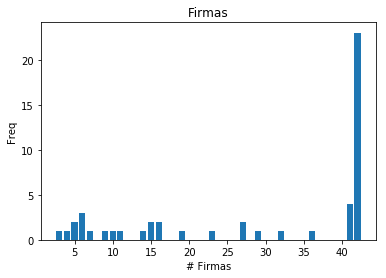

In [81]:
plt.bar(firmas.n_signatures, firmas.freq, align="center", )
plt.title("Firmas")
plt.ylabel("Freq")
plt.xlabel("# Firmas")
plt.show()

In [82]:
# Total number of sampled sheets
n = firmas.freq.sum(); n

50

In [83]:
# Total number of sampled signatures
y = firmas.n_signatures * firmas.freq

In [84]:
sum(firmas.n_signatures ** 2 * firmas.freq)

54497

To estimate the total number of signatures:
$$
    \hat{Y} = N\bar{y}= N(\frac{1}{n}\sum_i y_i)
$$

In [85]:
y_bar = sum(y) / n
Y_hat = np.round(N * y_bar); Y_hat

19888.000

To know the sample variance,
$$
    s^2 = \frac{\sum_i f_i(y_i - \bar{y})^2}{n - 1}
$$

where $f_i$ is the frequency

In [99]:
s2 = np.round(sum(firmas.freq * (firmas.n_signatures - y_bar) ** 2) / (n - 1)); s2

229.000

#### Computing the confidence interval

$$
    \left(N\bar{y} - \frac{tNs}{\sqrt{n}}\sqrt{1-f}, \  N\bar{y} + \frac{tNs}{\sqrt{n}}\sqrt{1-f}\right)
$$

In [116]:
t = 1.28

CI = np.round(N * y_bar + np.array([-1, 1]) * t * N * np.sqrt(s2) * np.sqrt(1 - n/N) / np.sqrt(n))
CI

array([ 18106.,  21670.])

Therefore, with 80% of certainty we can assure that the real, total number of signatures is around 18,106 and 21,670